# Integer Factorization

## Prime Numbers

Checking whether a number is prime:

In [1]:
# Finds the smallest divisor>1 of the given integer m>1
def min_divisor(m):
    for d in range(2, m + 1):
        if m % d == 0:
            return d
        # optimization:
        if d ** 2 > m:
            return m


for i in range(2, 25):
    divisor = min_divisor(i)
    print(f'\nThe smallest divisor>1 of {i} is {divisor}', end='')
    if divisor == i:
        print(f' (hence, {i} is prime)', end='')


The smallest divisor>1 of 2 is 2 (hence, 2 is prime)
The smallest divisor>1 of 3 is 3 (hence, 3 is prime)
The smallest divisor>1 of 4 is 2
The smallest divisor>1 of 5 is 5 (hence, 5 is prime)
The smallest divisor>1 of 6 is 2
The smallest divisor>1 of 7 is 7 (hence, 7 is prime)
The smallest divisor>1 of 8 is 2
The smallest divisor>1 of 9 is 3
The smallest divisor>1 of 10 is 2
The smallest divisor>1 of 11 is 11 (hence, 11 is prime)
The smallest divisor>1 of 12 is 2
The smallest divisor>1 of 13 is 13 (hence, 13 is prime)
The smallest divisor>1 of 14 is 2
The smallest divisor>1 of 15 is 3
The smallest divisor>1 of 16 is 2
The smallest divisor>1 of 17 is 17 (hence, 17 is prime)
The smallest divisor>1 of 18 is 2
The smallest divisor>1 of 19 is 19 (hence, 19 is prime)
The smallest divisor>1 of 20 is 2
The smallest divisor>1 of 21 is 3
The smallest divisor>1 of 22 is 2
The smallest divisor>1 of 23 is 23 (hence, 23 is prime)
The smallest divisor>1 of 24 is 2

List of the first $n$ primes:

In [2]:
def is_prime(m):
    return m == min_divisor(m)


def primes_list(n):
    lst = []
    boundary = 2
    # primes < boundary are in lst
    while len(lst) < n:
        if is_prime(boundary):
            lst.append(boundary)
        boundary += 1

    return lst


print('The first ten primes:')
print(primes_list(10))

The first ten primes:
[2, 3, 5, 7, 11, 13, 17, 19, 23, 29]


## Factoring

In [3]:
def factoring(m):
    if is_prime(m):
        return [m]
    else:
        divisor = min_divisor(m)
        return [divisor] + factoring(m // divisor)


for i in (7, 20, 60, 1001, 2 ** 32 + 1, 2 ** 64 + 1):
    print(i, '=', '*'.join(map(str, factoring(i))))


7 = 7
20 = 2*2*5
60 = 2*2*3*5
1001 = 7*11*13
4294967297 = 641*6700417
18446744073709551617 = 274177*67280421310721


Factoring Fermat numbers:

In [4]:
from sympy import factorint

for n in range(7):
    print(factorint(2 ** (2 ** n) + 1))

{3: 1}
{5: 1}
{17: 1}
{257: 1}
{65537: 1}
{641: 1, 6700417: 1}
{274177: 1, 67280421310721: 1}


# Chinese Remainder Theorem

In [5]:
for i in range(15):
    print(f'{i}: {i} mod 2={i % 2}, {i} mod 3={i % 3}')

0: 0 mod 2=0, 0 mod 3=0
1: 1 mod 2=1, 1 mod 3=1
2: 2 mod 2=0, 2 mod 3=2
3: 3 mod 2=1, 3 mod 3=0
4: 4 mod 2=0, 4 mod 3=1
5: 5 mod 2=1, 5 mod 3=2
6: 6 mod 2=0, 6 mod 3=0
7: 7 mod 2=1, 7 mod 3=1
8: 8 mod 2=0, 8 mod 3=2
9: 9 mod 2=1, 9 mod 3=0
10: 10 mod 2=0, 10 mod 3=1
11: 11 mod 2=1, 11 mod 3=2
12: 12 mod 2=0, 12 mod 3=0
13: 13 mod 2=1, 13 mod 3=1
14: 14 mod 2=0, 14 mod 3=2


In [6]:
for i in range(15):
    print(f'{i:2d}: ({i % 2}, {i % 4}) '
          f'({i % 3}, {i % 4}) '
          f'({i % 6}, {i % 4})')

 0: (0, 0) (0, 0) (0, 0)
 1: (1, 1) (1, 1) (1, 1)
 2: (0, 2) (2, 2) (2, 2)
 3: (1, 3) (0, 3) (3, 3)
 4: (0, 0) (1, 0) (4, 0)
 5: (1, 1) (2, 1) (5, 1)
 6: (0, 2) (0, 2) (0, 2)
 7: (1, 3) (1, 3) (1, 3)
 8: (0, 0) (2, 0) (2, 0)
 9: (1, 1) (0, 1) (3, 1)
10: (0, 2) (1, 2) (4, 2)
11: (1, 3) (2, 3) (5, 3)
12: (0, 0) (0, 0) (0, 0)
13: (1, 1) (1, 1) (1, 1)
14: (0, 2) (2, 2) (2, 2)


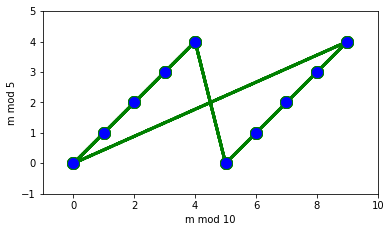

In [7]:
import matplotlib.pyplot as plt

a, b = 10, 5
n = a * b

plt.plot([i % a for i in range(n)], [i % b for i in range(n)],
         color='green', linestyle='dashed', linewidth=3,
         marker='o', markerfacecolor='blue', markersize=12)
  
plt.axis('square')
plt.xlim(-1, a)
plt.ylim(-1, b)
plt.xlabel(f'm mod {a}')
plt.ylabel(f'm mod {b}')

plt.savefig('crt-10-5.png')

Algorithmic version of Chinese Reminder Theorem:

In [8]:
from sympy import gcdex


def chinese_remainder_theorem(n1, r1, n2, r2):
    x, y, d = gcdex(n1, n2)
    assert n1 * x + n2 * y == d  # == gcd(n1, n2)
    y = -y
    assert n1 * x - n2 * y == d
    assert (r2 - r1) % d == 0
    x *= (r2 - r1) // d
    y *= (r2 - r1) // d
    assert n1 * x - n2 * y == r2 - r1
    return (n1 * x + r1) % (n1 * n2)


for n1, r1, n2, r2 in (
    (5, 3, 12, 7),
    (10, 3, 13, 8),
    (10, 3, 14, 1)
):
    result = chinese_remainder_theorem(n1, r1, n2, r2)
    print(f'If x={r1} mod {n1} and x={r2} mod {n2}, then x={result}')

If x=3 mod 5 and x=7 mod 12, then x=43
If x=3 mod 10 and x=8 mod 13, then x=73
If x=3 mod 10 and x=1 mod 14, then x=113


# Modular Exponentiation

In [9]:
print((314 ** 271) % 123)

38


In [10]:
print(pow(314, 271, 123))
print(pow(314159265358, 2718281828, 123456789))

38
32073907


In [11]:
def fast_modular_exponentiation(b, e, m):
    assert m > 0 and e >= 0
    if e == 0:
        return 1
    if e == 1:
        return b
    if e % 2 == 0:
        return fast_modular_exponentiation((b * b) % m, e // 2, m)
    else:
        return (fast_modular_exponentiation(b, e - 1, m) * b) % m


print(fast_modular_exponentiation(314159265358, 2718281828, 123456789))

32073907


## Fermat's Little Theorem

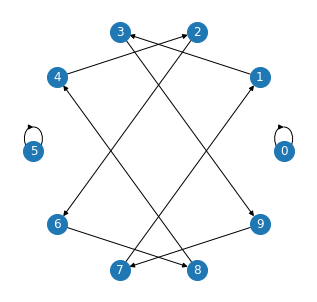

In [12]:
import networkx as nx
import matplotlib.pyplot as plt
from math import cos, sin, pi

n, factor, rad = 10, 3, 10

graph = nx.DiGraph()
graph.add_edges_from([(i, i * factor % n) for i in range(n)])

positions = [(rad * cos(i * 2 * pi / n), (rad * sin(i * 2 * pi / n)))
             for i in range(n)]

nx.draw(graph, pos=positions, with_labels=True,
        font_color='white', node_size=400, font_size=12)

plt.gca().set_aspect('equal')
plt.savefig('fermat.png')